# Visualization

## Import and Constants

In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

LOCATION = './data/part-0-6'
RESPONSES_ATTRIBUTE = 'bid_responses'
PRICE_ATTRIBUTE = 'bid_price'

NUM_FILES = 1 # [1, 7]

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Read

In [42]:
def filter_file():
    # Converts files but DOES NOT CONCATENATE
    for i in range(7):
        open('data/part-'+str(i),'w').writelines(line for line in open('data/part-0000'+str(i)) if 'bid_requests' in line)

data = pd.read_json(LOCATION, lines=True)
# raw_data = []
# costs = []
# with open(LOCATION) as file:
#     for line in file:
#         candidate = json.loads(line)
#         raw_data.append(candidate)
#         reponses = candidate[RESPONSES_ATTRIBUTE]
#             for repsonse in reponses:
#                 cost = float(repsonse[PRICE_ATTRIBUTE])
#                 costs.append(cost)
# data = pd.DataFrame(raw_data)
# costs = np.array(costs)

In [27]:
print("Publisher network distribution")
data.groupby(['pub_network_id'])['pub_network_id'].count()

Publisher network distribution


pub_network_id
2            5
3          182
106       4929
267     255981
727       2436
734     479680
767      32034
776        145
1179         1
1297         3
1538      2068
1664        13
1929        43
1931      3099
1995      2652
2086        14
Name: pub_network_id, dtype: int64

In [36]:
non_null = data.loc[(data['pub_network_id'] == 734) & (data.astype(str)['bid_responses'] != '[]')]

In [41]:
[[entry['bid_price'] for entry in lst] for lst in non_null['bid_responses']][:100]

[[0.0008],
 [0.0],
 [0.00011899999999999999],
 [0.0],
 [0.0009059, 0.000252, 0.00044],
 [0.004200000000000001],
 [0.00185],
 [0.000252, 0.0078878, 0.001049816],
 [0.0008],
 [7.233100000000001e-05],
 [0.004, 0.000252, 0.001049816],
 [0.0001021877],
 [0.0],
 [9.26e-05, 0.0008],
 [0.002],
 [0.00017999000000000002, 0.0001445, 0.0008],
 [0.00186],
 [0.0008],
 [5.999e-05, 5.999e-05, 0.0008],
 [5e-05],
 [5.67e-05, 0.00062996, 0.0],
 [8.7e-05],
 [0.0015818, 0.0030600000000000002],
 [0.00036546900000000005, 0.0015696500000000001, 0.001536775946617],
 [0.0023931, 0.0004392717],
 [8.22111365e-05],
 [8e-05],
 [5.3e-05, 0.000190442, 0.0008],
 [0.0],
 [4.90532219409943e-05],
 [0.000613150000572],
 [8.2125e-05, 0.0],
 [7.000000000000001e-05],
 [0.00035000000000000005],
 [5.32066667e-05],
 [0.0],
 [6.14e-05, 0.0],
 [0.0028594130000000003],
 [0.00042],
 [8.400000000000001e-05],
 [0.0],
 [0.0],
 [0.0058709999999999995, 0.000252, 0.00044],
 [0.0015512667817, 0.003003, 0.000252, 0.00044],
 [0.000706688200

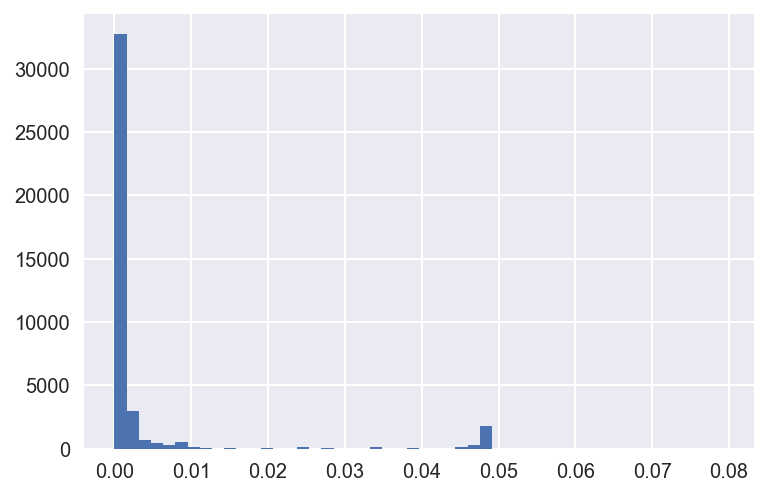

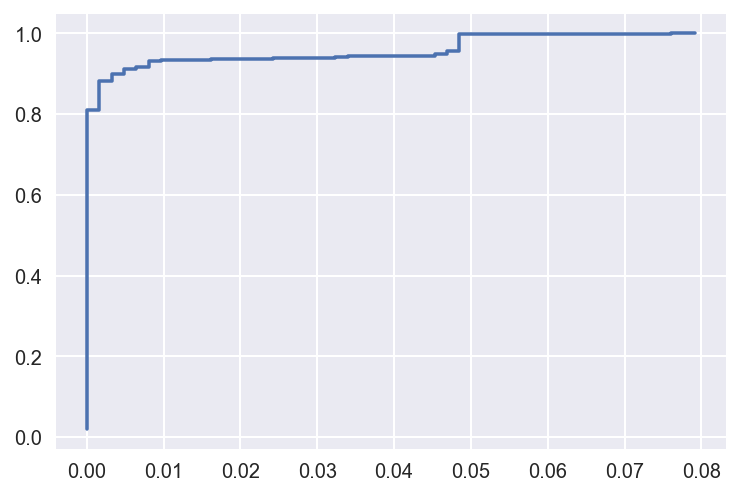

In [46]:
PLOTTING_OPTIONS = {'bins': 50}
plt.hist(costs, **PLOTTING_OPTIONS)
plt.show()

ecdf = sm.distributions.ECDF(costs)
x = np.linspace(min(costs), max(costs))
y = ecdf(x)
plt.step(x, y)
plt.show()